# COMP 10020 Introduction to Programming 2
## Lab 4 (10th April, 2017)
## New York Philharmonic Data Analysis

The rise of popularrity of **data science** has led to data science techniques being applied in some unexpected places, and to the release of some very interesting datasets. There are very few areas in which data science techiques are not making a difference.

One organisation that has released some very interesting datasets is the **New York Philharmonic Orchestra**. The Open Data at the New York Philharmonic project (http://archives.nyphil.org/index.php/open-data) makes data about performances and subscriptions at the New York Philharmonic stretching all the way back to its first performance in 1842. 

The goal of this assignment is to use data from the Philharmonic to answer questions about it's performances in recent years. 

<img src = "files/NYPhil.jpg" width = "500">

### Question 1: Load Datasets

Details of the performances by the New York Philharmonic orchestra are contained in the files **concerts.csv**, **works.csv**, and **soloists.csv**. Each row within **concerts.csv** describes a performance, using the followiung fields:

* **ID**: The ID of the performance
* **Event_Type**: The type of the performance
* **Location**: The location of the performance
* **Country**: The country where the performance was held
* **Venue**: The venue of the performance
* **Date**: The date of the performance, given as dd/mm/yyyy (e.g. 24/07/2014, 02/03/2012)
* **Start_Time**: The time that the performance started given as hh:mm (e.g. 17:30, 11:00)
* **End_Time**: The time that the performance ended given as hh:mm (e.g. 17:30, 11:00)
* **Duration**: The duration of the concert

Each row within **works.csv** contains details of the works performed in a particular performance, using the following fields:

* **ID**: The ID of the performance (links to the data in the concerts.csv file)
* **Orchestra**: The name of the orchestra that performed
* **ComposerName**: The name of the composer(s) whose work was performed
* **ConductorName**: The name of the conductor

Each row within **soloists.csv** contains details of the soloist(s) that performed in a particular performance, using the following fields:

* **ID**: The ID of the performance (links to the data in the concerts.csv file)
* **Soloist_Rank**: The rank of the solist within in the perfomrance (e.g. 1st, 2nd, 3rd, ...)
* **Soloist_Name**: The name of the soloist
* **Soloist_Instrument**: The instrument the soloist played

Load the three datasets (**concerts.csv**, **works.csv**, and **soloists.csv**) into pandas data frames: **concerts**, **works**, and **soloists**. Display the first five rows from each.

In [86]:
# Import useful packages for data science
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline  

In [106]:
# Load concerts.csv
concerts = pd.read_csv('concerts.csv')
display(concerts.head())
display(concerts.tail())

,ID,Event_Type,Location,Country,Venue,Date,Start_Time,End_Time,Duration
0,1,Non-Subscription,Manhattan,USA,Avery Fisher Hall,07/09/2011,19:30,23:05,215
1,2,Non-Subscription,Manhattan,USA,Avery Fisher Hall,08/09/2011,19:30,22:50,200
2,3,Insight Series,Manhattan,USA,The Stanley H. Kaplan Penthouse,09/09/2011,18:30,21:00,150
3,4,Special,Manhattan,USA,Avery Fisher Hall,10/09/2011,19:30,22:44,194
4,5,Parks,Manhattan,USA,Great Lawn,15/09/2011,20:00,23:47,227


,ID,Event_Type,Location,Country,Venue,Date,Start_Time,End_Time,Duration
1007,1008,Off the Grid,Manhattan,USA,Angel Orensanz Foundation,15/03/2016,20:00,23:18,198
1008,1009,Subscription Season,Manhattan,USA,David Geffen Hall,17/03/2016,19:30,21:52,142
1009,1010,Subscription Season,Manhattan,USA,David Geffen Hall,18/03/2016,20:00,21:47,107
1010,1011,Subscription Season,Manhattan,USA,David Geffen Hall,19/03/2016,20:00,22:36,156
1011,1012,Young People's Concert,Manhattan,USA,David Geffen Hall,19/03/2016,14:00,16:49,169


In [107]:
# Load works.csv
works = pd.read_csv('works.csv')
works.head()

,ID,Orchestra,ComposerName,ConductorName
0,396,New York Philharmonic,"Salonen, Esa-Pekka","Gilbert, Alan"
1,295,New York Philharmonic,"Sibelius, Jean","Gersen, Joshua"
2,122,New York Philharmonic,"Brahms, Johannes","Dohnanyi, Christoph von"
3,874,New York Philharmonic,"Debussy, Claude","Gilbert, Alan"
4,755,New York Philharmonic,"Ravel, Maurice","Gilbert, Alan"


In [108]:
# Load soloists.csv
soloists = pd.read_csv('soloists.csv')
soloists.head()

,ID,Soloist_Rank,Soloist_Name,Soloist_Instrument
0,921,2,"Ward-Bergeman, Michael",Accordion
1,461,3,"Jennings, John",Accoustic Bass
2,479,3,"Jennings, John",Accoustic Bass
3,496,3,"Jennings, John",Accoustic Bass
4,517,3,"Jennings, John",Accoustic Bass


### Question 2: Simple Analysis

Use simple data analysis to answer the following questions. 

**a)** Generate and print a table showing many times have works been performed by each composer in the dataset?

In [109]:
print(works["ComposerName"].value_counts().to_string())

Tchaikovsky, Pyotr Ilyich                                 57
Beethoven, Ludwig van                                     46
Mozart, Wolfgang Amadeus                                  42
Prokofiev, Sergei                                         41
Ravel, Maurice                                            36
Bernstein, Leonard                                        36
Strauss, Richard                                          33
Sibelius, Jean                                            25
Dvorak, AntonÌ_n                                          24
Stravinsky, Igor                                          23
Gershwin, George                                          21
Berlioz, Hector                                           19
Respighi, Ottorino                                        19
Brahms, Johannes                                          18
Anthem,                                                   15
Nielsen, Carl                                             14
Bartok [BartÌ_k], BÌ©la 

**b)** In how many different locations have there been concerts?

In [129]:
# Count the number of times each location has appeared in the concerts dataset, and print the number of locations
len(set(concerts["Location"]))

47

**c)** How many times has there been a concert in Dublin in Ireland?

In [130]:
# Count the number of times each location has appeared in the concerts dataset, and print the number of times Cologne, GERMANY has appeared
set(concerts["Location"])
len(concerts[concerts["Location"]=='Dublin'])

1

**d)** How many times has the Harp been a soloist instrument?

In [131]:
# Count the number of times each instrument has appeared in the soloists dataset, and print the number of times Bassoon appeared
set(soloists["Soloist_Instrument"])
len(soloists[soloists["Soloist_Instrument"]=='Harp'])

9

**e)** Who are the three most popular composers?

**Bonus:** Print composers' names as first name followed by last name.

In [132]:
# Count the number of times each composer has appeared in the works dataset
concert_conductor_counts = works["ComposerName"].value_counts()

# Iterate through the top three composers
print("Top three composers: ")
for i in range(0, 3):
    # Isolate the parts of the composers name and rearrange it
    conductor = concert_conductor_counts.keys()[i]
    conductorLast = conductor.split(",")[0]
    conductorFirst = conductor.split(",")[1]
    print(conductorFirst, conductorLast)


Top three composers: 
 Pyotr Ilyich Tchaikovsky
 Ludwig van Beethoven
 Wolfgang Amadeus Mozart


### Question 3: Deeper Analysis

Use slightly more advanced data analysis to answer the following questions.

**a)** Draw an appropriate data visualsiation that shows the number of concerts played in each location outside of the United Statess of America?

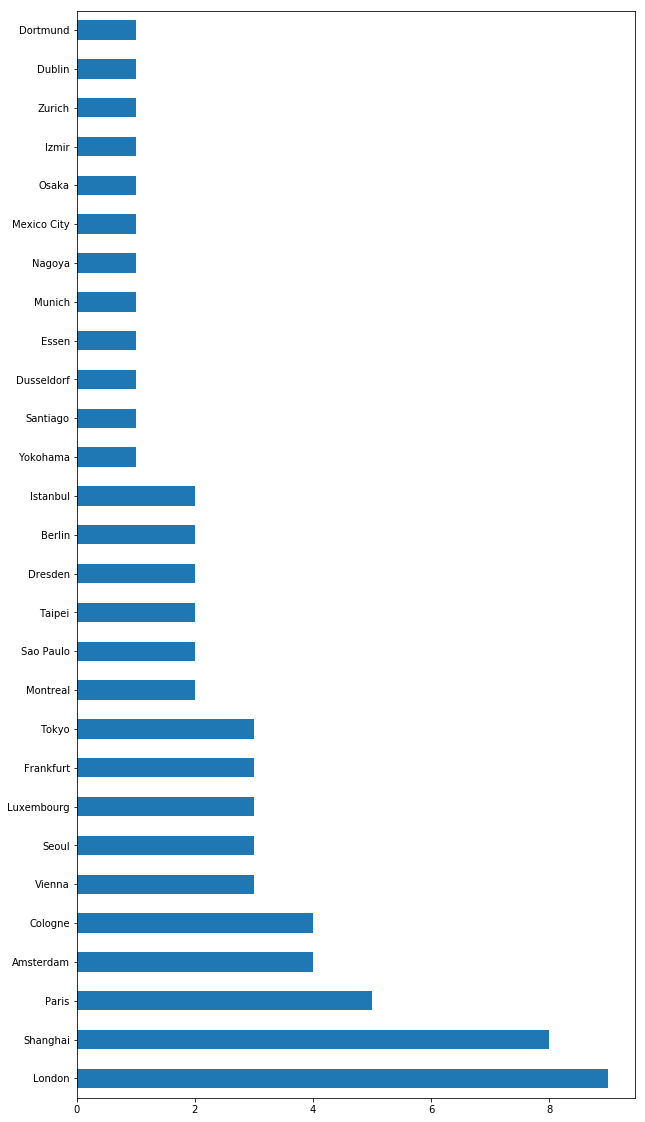

In [133]:
# Make a  histogram of durations
foreign_concerts = concerts[concerts["Country"] != "USA"]
concert_loc_counts = foreign_concerts["Location"].value_counts()
concert_loc_counts.plot(kind = "barh", figsize = (10,20))

**b)** How many times has there been a concert anywhere in Germany?

**Hint:** Experiment with the *str.contains* method from *pandas.Series*.

In [137]:
german_concerts = concerts[concerts["Country"]== "GERMANY"]
print("Number of concerts in Germany:", len(german_concerts))

Number of concerts in Germany: 15


**c)** What is the average duration of a concert (in minutes)?

In [138]:
# Calculate the difference between the start and end times
print("Average concert duration " + str(concerts["Duration"].mean()) + " minutes")

Average concert duration 178.31422924901185 minutes


**d)** Are performances of works by Beethoven of longer duration, on average, than performances of works by Mozart? 

**Bonus:** Can you plot a data visualisation to support this conclusion?

In [139]:
import pandas as pd

# Join the works and concerts tables
concerts_with_works = pd.merge(concerts, works, on="ID", how = 'outer')
concerts_with_works.head()
works.shape

(986, 4)

In [140]:
# Extract concerts by Mozart and calculate their mean duration

concerts_with_works_mozart = concerts_with_works[concerts_with_works["ComposerName"] == "Mozart, Wolfgang Amadeus"]
print("Mozart average duration: ", concerts_with_works_mozart["Duration"].mean())


Mozart average duration:  172.07142857142858


In [141]:
# Extract concerts by Beethoven and calculate their mean duration
concerts_with_works_beethoven = concerts_with_works[concerts_with_works["ComposerName"] == "Beethoven, Ludwig van"]
print("Beethoven average duration: ", concerts_with_works_beethoven["Duration"].mean())

Beethoven average duration:  172.8695652173913


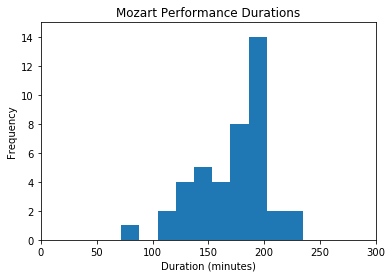

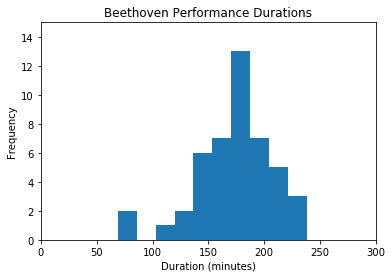

T-test p value:  0.9144950911612901


In [142]:
# Draw histrograms of Mozart and Beethoven performance durations
concerts_with_works_mozart["Duration"].plot(kind="hist", xlim = (0, 300), ylim = (0, 15), title="Mozart Performance Durations")
plt.xlabel("Duration (minutes)")
plt.show()
concerts_with_works_beethoven["Duration"].plot(kind="hist", xlim = (0, 300), ylim = (0, 15), title="Beethoven Performance Durations")
plt.xlabel("Duration (minutes)")
plt.show()

# Perform a t-test
import scipy.stats
t, p = scipy.stats.ttest_ind(concerts_with_works_mozart["Duration"], concerts_with_works_beethoven["Duration"], equal_var=False)
print("T-test p value: ", p)

**e)** Determine the most popular composer for year in the dataset? 

In [122]:
concerts_with_works['Year'] = concerts_with_works['Date'].str[-4:]

In [127]:
for year in concerts_with_works['Year'].unique():
    events = concerts_with_works[concerts_with_works['Year'] == year]
    # Count the number of times each composer has appeared in the works dataset
    composer_counts = events["ComposerName"].value_counts()
    composer = composer_counts.keys()[0]
    last = composer.split(",")[0]
    first = composer.split(",")[1]
    print(year, first, last)
    

2011  Carl W. Stalling
2012  Sergei Prokofiev
2013  Ludwig van Beethoven
2014  Pyotr Ilyich Tchaikovsky
2015  Richard Strauss
2016  Sergei Prokofiev
